## Finance Loan Approval Prediction  
Goal : Automate loan eligibility prediction using customer data collected from application forms
- Type of Problem: Supervised classification
- Target Variable: Loan_Status (Yes/No)

### Load the dataset

In [30]:
import pandas as pd
import numpy as np

# Load train and test data
train = pd.read_csv('C:/Users/HP/Documents/My_DA_Journey/Finance Loan Approval Prediction/Data/train.csv')
test = pd.read_csv('C:/Users/HP/Documents/My_DA_Journey/Finance Loan Approval Prediction/Data/test.csv')

# Check shape and preview
print("Train shape:", train.shape)
print("Test shape:", test.shape)

# First few rows
train.head()


Train shape: (614, 13)
Test shape: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking for Missing Values 

In [59]:
# Data types and missing values
# train.info()

# Quick overview of missing values
train.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling in the missing Values in data

In [31]:
# 3. Target encoding
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

# 4. Define categorical and numerical features
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'Credit_History', 'Property_Area']

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# 5. Fill missing values
for col in numerical_cols:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(train[col].median())

for col in categorical_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])






### Univariate Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_17184\449353424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='Set2', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_17184\449353424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='Set2', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_17184\449353424.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette='Set2', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_17184\449353424.py:18: Future

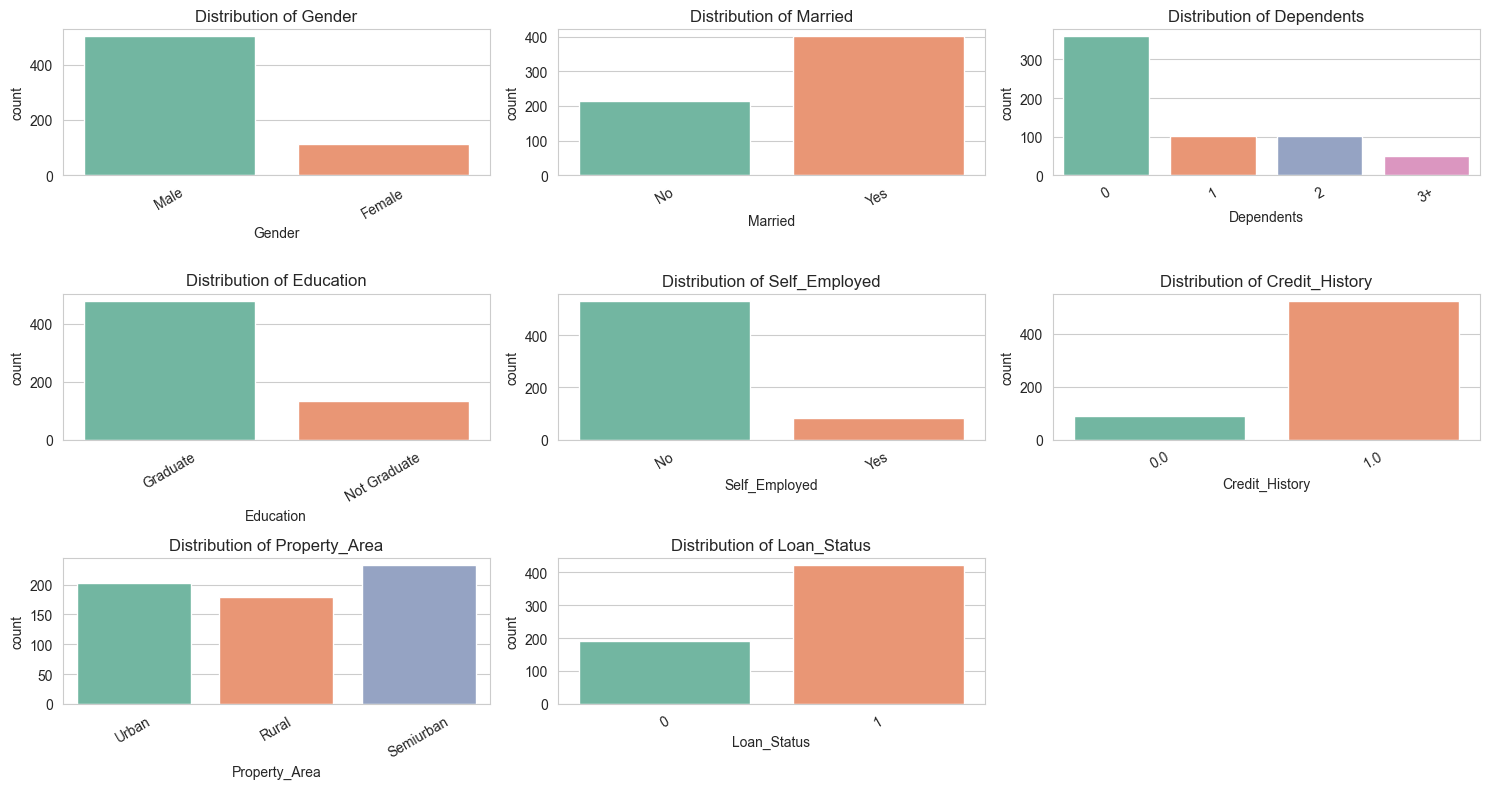

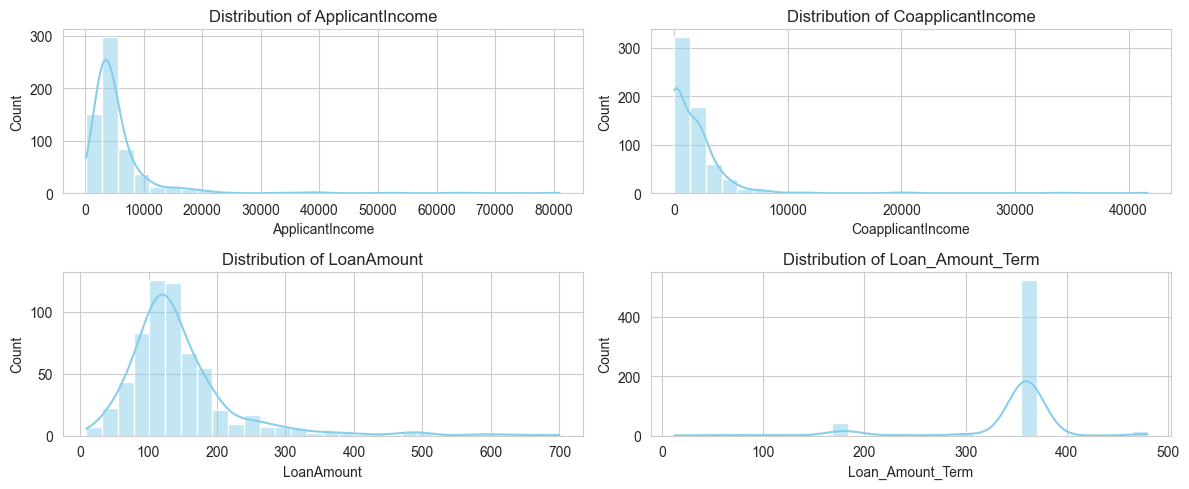

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style('whitegrid')

# Univariate Analysis for Categorical Columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'Credit_History', 'Property_Area', 'Loan_Status']

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=train, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=30)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# -------------------------------------

# Univariate Analysis for Numerical Columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Multivariate Analysis 

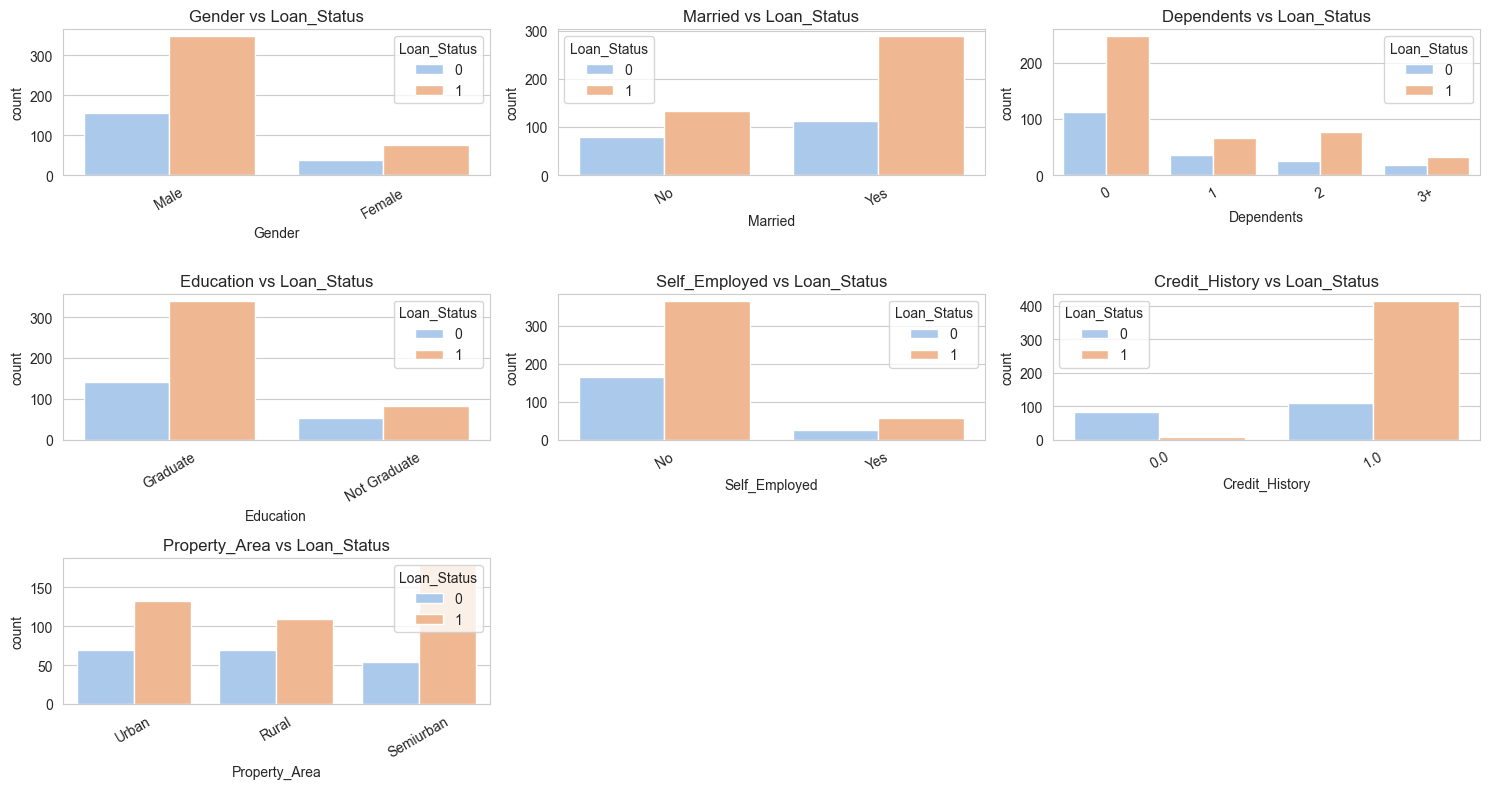

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style('whitegrid')

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                    'Credit_History', 'Property_Area', 'Loan_Status']

# Skip Loan_Status itself
multivariate_categorical_cols = categorical_cols[:-1]

n_cols = 3
n_rows = (len(multivariate_categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(multivariate_categorical_cols):
    sns.countplot(data=train, x=col, hue='Loan_Status', palette='pastel', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan_Status')
    axes[i].tick_params(axis='x', rotation=30)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17184\3502343576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=train, palette='coolwarm', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_17184\3502343576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=train, palette='coolwarm', ax=axes[i])
C:\Users\HP\AppData\Local\Temp\ipykernel_17184\3502343576.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=train, palette='coolwarm', ax=axes[i])


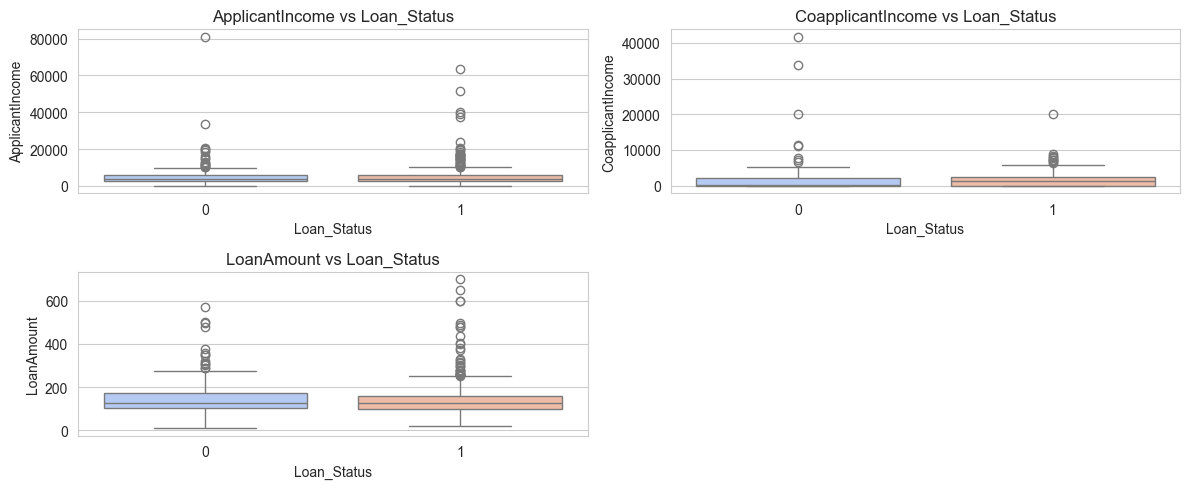

In [63]:
# Numerical Columns Multivariate
multivariate_numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

n_cols = 2
n_rows = (len(multivariate_numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(multivariate_numerical_cols):
    sns.boxplot(x='Loan_Status', y=col, data=train, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{col} vs Loan_Status')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Preprocessing and Logistic model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


# 6. Set X and y
X = train.drop(columns=['Loan_ID', 'Loan_Status'])
y = train['Loan_Status']



# 7. Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# 8. Build full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# 9. Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 10. Train the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classifier', LogisticRegression(random_state=42))])

### Model Evaluation

In [51]:
# 11. Predict and evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = pipeline.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))

Validation Accuracy: 0.8617886178861789

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


Confusion Matrix:
 [[22 16]
 [ 1 84]]


### Predict test data

In [ ]:
# Predict on test dataset
X_test = test.drop(columns=['Loan_ID'])  # drop Loan_ID
test_preds = pipeline.predict(X_test)

# Convert predictions back to 'Y' and 'N'
test_preds_labels = pd.Series(test_preds).map({1:'Y', 0:'N'})

# Attach to Loan_ID for submission
submission = pd.DataFrame({
    'Loan_ID': test['Loan_ID'],
    'Loan_Status': test_preds_labels
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved!")


Submission file saved!
